## Combining and visualising .csv data

#### Code created by Deniz Bekat (*deniz.bekat@crick.ac.uk*)

This code is designed to combine data from different images, saved in the form of `.csv` files (as in the stack property and cell counting Notebooks). In this notebook we:

- Collect all .csv files in your folders and combine them into one `pandas` Data Frame
- Normalise your measurements where needed, to account for differences between samples
- Produce a plot of your data using `seaborn` to visualise your quantitative analysis!

### **Importing libraries**

Python contains several **modules and packages** that provide the tools to analyse our images; we can use the code ``` import ``` to use them within this code:

In [1]:
#loading required modules

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import glob
from scipy.stats import linregress
import seaborn as sns

### Combining your data into one DataFrame

The module `pandas` can store `.csv` files in the form of **DataFrames**, which can then be used for easy analysis of your data. 

This section finds your folder of `.csv` files, and **combines** them into one DataFrame for further analysis

In [ ]:


folder_path = "../CBIAS/Gloria_NL5_organoids/intensities/uncleared/"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    df["Image"] = os.path.basename(file).replace(".csv", "")
    dfs.append(df)

# Combine all
all_data = pd.concat(dfs, ignore_index=True)

In [ ]:
all_data.head() #shows the first 5 entries of data - make sure that the data is how you expect it to look!

,Unnamed: 0,Slice,Mean Intensity,Std Dev,Imaging depth,Image
0,0,1,1658.068018,330.565987,10,cal127-1A1-NL5
1,1,2,1710.804130,375.074661,20,cal127-1A1-NL5
2,2,3,1776.231628,428.210330,30,cal127-1A1-NL5
3,3,4,1852.428018,490.495776,40,cal127-1A1-NL5
4,4,5,1944.396964,568.240713,50,cal127-1A1-NL5


### OPTIONAL: Normalise your data!

Some of your data might have different microscope systems or settings, and have different intensity ranges, making them difficult to combine together. Here, we normalise your *mean* and *standard deviation* data as a percentage (from 0-100% of the maximum values per dataset).

This is applied PER .csv file, so then all the data will fit in much better!

In [5]:

def normalise_mean(df):

    dmin = df['Mean Intensity'].min()
    dmax = df['Mean Intensity'].max()
    df['Normalised Mean'] = (df['Mean Intensity'] - dmin) / (dmax - dmin) * 100

    return df

def normalise_std(df):

    dmin = df['Std Dev'].min()
    dmax = df['Std Dev'].max()
    df['Normalised Std Dev'] = (df['Std Dev'] - dmin) / (dmax - dmin) * 100

    return df


# Apply normalization per image
all_data = all_data.groupby("Image", group_keys=False).apply(normalise_mean)
all_data = all_data.groupby("Image", group_keys=False).apply(normalise_std)


/var/folders/7f/hg9dvgw56bb9hz00r_fzpj9c0000gp/T/ipykernel_54155/3597018789.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_data = all_data.groupby("Image", group_keys=False).apply(normalise_mean)
/var/folders/7f/hg9dvgw56bb9hz00r_fzpj9c0000gp/T/ipykernel_54155/3597018789.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_data = all_data.groupby("Image", group_keys=False).apply(normalise_std)


### Plotting your data with `seaborn`

The library `seaborn` is a library that utilises `matplotlib` to make simply and high-quality plots. In this case, we draw line plots for each image in your dataset to show how your variables change with imaging depth; just change the `y=` line of code to measure whatever you want!

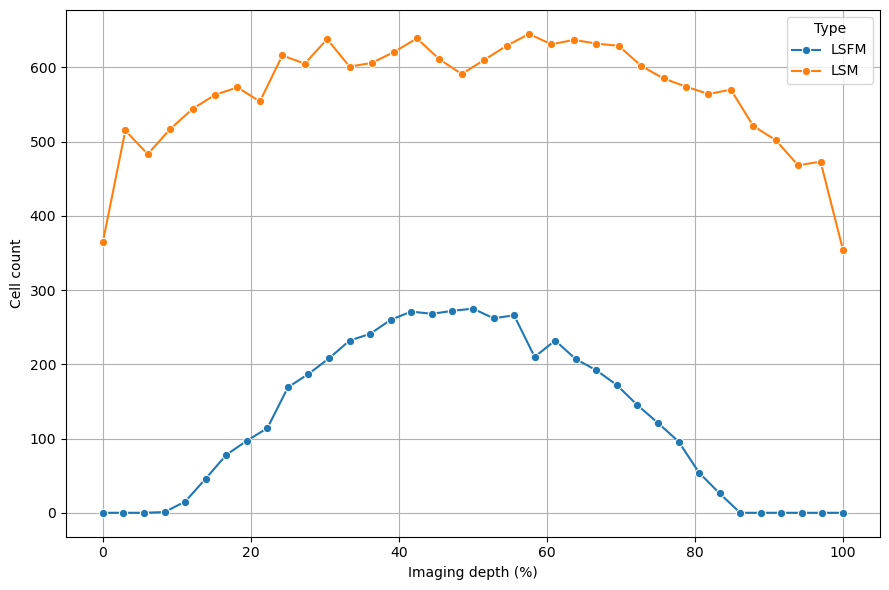

In [ ]:
plt.figure(figsize=(9, 6))

for t, df_t in all_data.groupby("Image"):
    sns.lineplot(
        data=df_t,
        x="Imaging depth", 
        y="nuclei_count", #change this to whatever you want to measure!
        units="Image",
        estimator=None,
        lw=1.5,
        marker='o',
        label=t  # only once per type, but safe to deduplicate below
    )


plt.grid(True)
plt.xlabel("Imaging depth (%)")
plt.ylabel("Cell count")

# ✅ remove duplicate legend labels (in case)
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), title="Type")

plt.tight_layout()
plt.show() # copy the plot and use it wherever! Enjoy the 'clear' results :)
